<a href="https://colab.research.google.com/github/limky21/NLP/blob/main/NLP_aphasilogy_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 데이터 로딩

In [ ]:
import pandas as pd

# CSV 파일 경로 (사용자의 파일 경로로 변경)
file_path = "/content/Aphasiology_임경열_2024.csv"

# UTF-8 BOM 문제 해결하여 CSV 파일 로드
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# 컬럼명 변경 ('ï»¿year' → 'year')
df = df.rename(columns={df.columns[0]: "year"})

# 변경된 컬럼명 확인
print(df.columns)


Index(['year', 'issue', 'title', 'abstract'], dtype='object')


#2 논문 게재 수 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45436 (\N{HANGUL SYLLABLE NON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

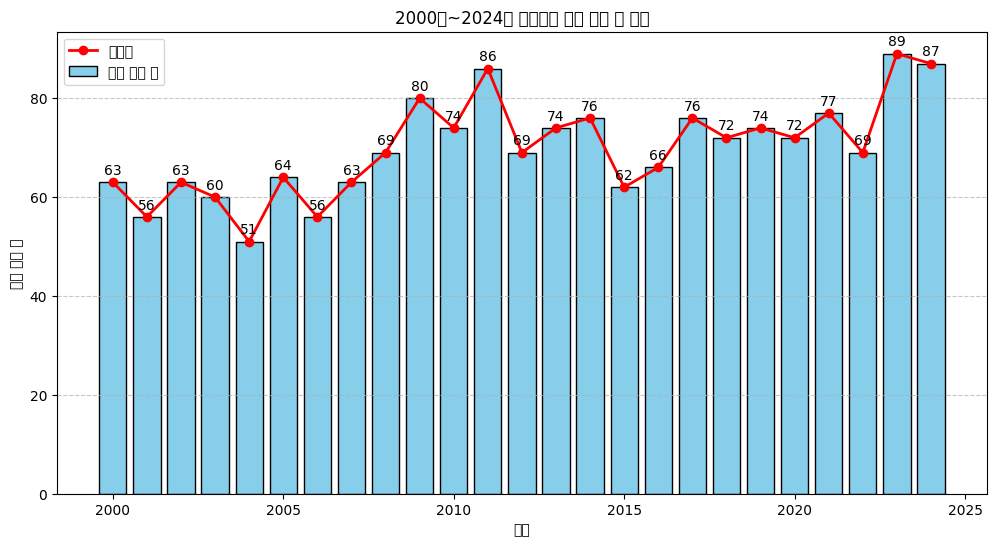

In [ ]:
import matplotlib.pyplot as plt

# 연도별 논문 개수 계산
yearly_paper_counts = df["year"].value_counts().sort_index()

# 그래프 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대 그래프 (논문 개수)
bars = ax1.bar(yearly_paper_counts.index, yearly_paper_counts.values, color="skyblue", edgecolor="black", label="논문 게재 수")

# 막대 위쪽에 논문 개수 표시
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10, color="black")

# 꺾은선 그래프 (추세) - 막대 꼭대기 위로 그리기
ax1.plot(yearly_paper_counts.index, yearly_paper_counts.values, marker="o", color="red", linestyle="-", linewidth=2, label="추세선")

# 라벨 및 제목 설정
ax1.set_xlabel("연도")
ax1.set_ylabel("논문 게재 수", color="black")
ax1.set_title("2000년~2024년 연구대상 논문 게재 수 변화")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# 범례 추가
ax1.legend(loc="upper left")

# 그래프 출력
plt.show()



In [ ]:
#3 수정된 CSV 파일 저장 (UTF-8로 인코딩)

In [ ]:
# 수정된 CSV 파일 저장 (UTF-8로 인코딩)
df.to_csv("/content/Aphasiology_임경열_2024_fixed.csv", index=False, encoding="utf-8")

print("✅ 수정된 데이터가 저장되었습니다: Aphasiology_임경열_2024_fixed.csv")


✅ 수정된 데이터가 저장되었습니다: Aphasiology_임경열_2024_fixed.csv


#4 수정된 파일경로

In [ ]:
import pandas as pd

# 수정된 CSV 파일 경로 (파일명을 정확하게 입력)
file_path = "/content/Aphasiology_임경열_2024_fixed.csv"

# CSV 파일 로드
df = pd.read_csv(file_path, encoding="utf-8")

# 데이터 확인
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      1748 non-null   int64 
 1   issue     1748 non-null   int64 
 2   title     1748 non-null   object
 3   abstract  1748 non-null   object
dtypes: int64(2), object(2)
memory usage: 54.8+ KB


,year,issue,title,abstract
0,2024,1,Priming Sentence Production in Older Adults: E...,ABSTRACT\nPurpose\nStructural priming- speaker...
1,2024,1,Patient Perspectives of a University-Based Int...,ABSTRACT\nBackground\nStroke survivors with ap...
2,2024,1,âPlay on Wordsâ: An analysis of a particip...,ABSTRACT\nWe describe the impacts that weekly ...
3,2024,1,Structural priming from production to comprehe...,ABSTRACT\nBackground\nMany people with aphasia...
4,2024,1,âDifficult but Goodâ: enjoying accessible ...,ABSTRACT\nBackground\nDigital technology is in...


#5 stopword 처리

In [ ]:
import spacy

# spaCy의 영어 모델 다운로드 (최초 1회 필요)
!python -m spacy download en_core_web_sm

# spaCy 모델 로드
nlp = spacy.load("en_core_web_sm")

# 텍스트 전처리 함수 (spaCy 활용)
def preprocess_text_spacy(text):
    doc = nlp(text.lower())  # 소문자 변환 및 NLP 파이프라인 적용
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]  # 표제어 추출 및 불용어 제거
    return ' '.join(tokens)

# abstract 컬럼에 전처리 적용
df['processed_abstract'] = df['abstract'].apply(preprocess_text_spacy)

# 전처리된 데이터 확인
df[['abstract', 'processed_abstract']].head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 38.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


,abstract,processed_abstract
0,ABSTRACT\nPurpose\nStructural priming- speaker...,abstract purpose structural unconscious tenden...
1,ABSTRACT\nBackground\nStroke survivors with ap...,abstract background stroke survivor aphasia pa...
2,ABSTRACT\nWe describe the impacts that weekly ...,abstract describe impact weekly drama session ...
3,ABSTRACT\nBackground\nMany people with aphasia...,abstract background people aphasia pwa deficit...
4,ABSTRACT\nBackground\nDigital technology is in...,abstract background digital technology increas...


#6 가장 많이 등장한 상위 20개 단어 추출

In [ ]:
from collections import Counter

# 모든 전처리된 텍스트를 하나의 리스트로 결합하여 단어 빈도 분석 수행
all_words = ' '.join(df['processed_abstract']).split()
word_freq = Counter(all_words)

# 가장 많이 등장한 상위 20개 단어 추출
top_words = word_freq.most_common(20)

# 데이터프레임 생성
import pandas as pd
freq_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# 결과 출력
freq_df

,Word,Frequency
0,aphasia,6748
1,study,3241
2,language,2887
3,result,2855
4,participant,2555
5,treatment,2532
6,word,2221
7,aim,2202
8,outcome,1896
9,method,1799


#7 사용자 지정 불용어 추가

In [ ]:
from collections import Counter

# 사용자 지정 불용어 추가
custom_stopwords = set([
    "study", "word", "participant", "result", "group", "communication",
    "individual", "patient", "task", "aim", "effect", "outcome", "method",
    "procedure", "background", "conclusion", "people", "study", "result", "participant", "word", "aim", "outcome", "method", "individual", "group", "task","background","conclusion", "procedure", "patient", "effect",
    "treatment", "measure", "production", "research", "test", "analysis", "provide", "use", "support", "include", "pwa", "datum", "et", "al", "na", "bfa", "esfa", "known", "ciat", "vas", "rtw", "rfp", "correlational", "need",
    "doctoral", "largely", "wpo", "bpwa", "non", "person", "ppa", "verbs", "seventeen", "bwa", "extensively", "specifically", "cnt", "umnd", "rus", "mit", "applicable", "fairly", "devastating", "fas"
])

# 기존 stopwords + 사용자 지정 stopwords 적용
def preprocess_text_updated(text):
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]  # 사용자 정의 불용어 제거
    return ' '.join(words)

# 전처리된 텍스트에 새로운 stopwords 적용
df['filtered_abstract'] = df['processed_abstract'].apply(preprocess_text_updated)

# 단어 빈도 분석
all_words_filtered = ' '.join(df['filtered_abstract']).split()
word_freq_filtered = Counter(all_words_filtered)

# 상위 20개 단어 추출
filtered_top_words = word_freq_filtered.most_common(20)

# 데이터프레임 생성
import pandas as pd
filtered_freq_df = pd.DataFrame(filtered_top_words, columns=['Word', 'Frequency'])

# 결과 출력
filtered_freq_df


,Word,Frequency
0,aphasia,6748
1,language,2887
2,speech,1795
3,therapy,1377
4,semantic,1258
5,sentence,1138
6,impairment,1077
7,verb,1047
8,stroke,1023
9,performance,1021


#상위 키워드 분석(Word2Vec)

#8 gensim 설치

In [ ]:
!pip install gensim


#9 numpy scipy ungrade 실시


In [ ]:
!pip install --upgrade numpy scipy


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,

#10 numpy, scipy, gensim 새로운 버전 설치

In [ ]:
!pip install numpy==1.26.4 scipy==1.13.0
!pip install --upgrade gensim


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.2
    Uninstalling gensim-4.

#11 library 재수정

In [ ]:
!pip uninstall -y numpy scipy gensim
!pip install numpy==1.26.4 scipy==1.13.0 gensim==4.3.3


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.0
Uninstalling scipy-1.13.0:
  Successfully uninstalled scipy-1.13.0
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


#11 library 재수정2

In [ ]:
!pip install numpy==1.24.3 scipy==1.10.1 gensim==4.3.2


  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
Using cached gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.0
    Uninstalling scipy-1.13.0:
      Successfully uninstalled scipy-1.13.0
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensi

#12 Word2Vec 실시

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# 전처리된 텍스트를 문장 단위로 토큰화
sentences = [simple_preprocess(text) for text in df['filtered_abstract']]

# Word2Vec 모델 학습
w2v_model = Word2Vec(
    sentences,
    vector_size=100,  # 벡터 크기
    window=5,         # 주변 단어 고려 범위
    min_count=5,      # 최소 등장 횟수
    workers=4,        # 병렬 처리
    sg=1              # Skip-gram 사용 (CBOW 사용 시 sg=0)
)

# 학습된 단어 개수 출력
print(f"Total vocabulary size: {len(w2v_model.wv)}")


Total vocabulary size: 3986


#12-1 Word2Vec 실시

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# 전처리된 텍스트를 문장 단위로 토큰화
sentences = [simple_preprocess(text) for text in df['filtered_abstract']]

# Word2Vec 모델 학습
w2v_model = Word2Vec(
    sentences,
    vector_size=100,    # 벡터 크기 100
    window=5,           # 주변 단어 고려 범위 5
    min_count=5,        # 최소 등장 횟수 5
    workers=4,          # 병렬 처리
    sg=1                # Skip-gram (sg=1) / CBOW(sg=0)
)

# 학습된 단어 개수 출력
print(f"Total vocabulary size: {len(w2v_model.wv)}")


Total vocabulary size: 3986


#13 상위 10개 키워드 및 관련 키워드 5개 추출

In [ ]:
from collections import Counter
import pandas as pd

# 단어 빈도 분석
all_words_filtered = ' '.join(df['filtered_abstract']).split()
word_freq_filtered = Counter(all_words_filtered)

# 상위 10개 키워드 추출
top_10_words = word_freq_filtered.most_common(10)

# 각 키워드에 대해 관련성이 높은 키워드 5개씩 추출
related_words_dict = {}
for word, freq in top_10_words:
    if word in w2v_model.wv:
        related_words = [sim[0] for sim in w2v_model.wv.most_similar(word, topn=5)]
    else:
        related_words = ["N/A"] * 5  # Word2Vec 모델에 없는 단어 처리
    related_words_dict[word] = [freq] + related_words

# 데이터프레임 변환
columns = ["Frequency"] + [f"Related Word {i+1}" for i in range(1, 6)]
related_words_df = pd.DataFrame.from_dict(related_words_dict, orient='index', columns=columns)

# 출력
print("=== <표 1> 상위 10개 키워드 및 관련 키워드 ===")
print(related_words_df)


=== <표 1> 상위 10개 키워드 및 관련 키워드 ===
             Frequency Related Word 2 Related Word 3 Related Word 4  \
aphasia           6748      aetiology        bengali     resilience   
language          2887          music     linguistic     proficient   
speech            1795           limb     dysarthria      kinematic   
therapy           1377      intensive        deliver      errorless   
semantic          1258    degradation     conceptual    distinctive   
sentence          1138  syntactically      canonical     reversible   
impairment        1077        deficit   characterize  deterioration   
verb              1047           noun   instrumental       argument   
stroke            1023      inpatient       subacute       survivor   
performance       1021      listening   discriminate         poorly   

            Related Word 5   Related Word 6  
aphasia          ascertain     multilingual  
language          globally        prestroke  
speech             apraxic      programming  


#14 상위 10개 키워드 및 관련 키워드

In [ ]:
# 단어 빈도 분석
all_words_filtered = ' '.join(df['filtered_abstract']).split()
word_freq_filtered = Counter(all_words_filtered)

# 상위 10개 키워드 추출
top_10_words = [word for word, freq in word_freq_filtered.most_common(10)]

# 각 키워드에 대해 관련성이 높은 키워드 5개씩 추출
related_words_dict = {}
for word in top_10_words:
    if word in w2v_model.wv:
        related_words_dict[word] = w2v_model.wv.most_similar(word, topn=5)
    else:
        related_words_dict[word] = [("N/A", 0)] * 5  # 모델에 없는 단어 처리

# 데이터프레임 변환
related_words_df = pd.DataFrame.from_dict(related_words_dict, orient='index',
                                          columns=[f'Related Word {i+1}' for i in range(1, 6)])

# 출력
print("=== <표 1> 상위 10개 키워드 및 관련 키워드 ===")
print(related_words_df)


=== <표 1> 상위 10개 키워드 및 관련 키워드 ===
                                  Related Word 2  \
aphasia          (aetiology, 0.6624825596809387)   
language             (music, 0.7065857648849487)   
speech                 (limb, 0.612003743648529)   
therapy          (intensive, 0.8069983720779419)   
semantic       (degradation, 0.7300006747245789)   
sentence     (syntactically, 0.8173533082008362)   
impairment         (deficit, 0.8298476338386536)   
verb                  (noun, 0.7715656161308289)   
stroke           (inpatient, 0.7208424210548401)   
performance      (listening, 0.7545967102050781)   

                                 Related Word 3  \
aphasia           (bengali, 0.6460862755775452)   
language       (linguistic, 0.6677551865577698)   
speech         (dysarthria, 0.5766016840934753)   
therapy           (deliver, 0.7800582051277161)   
semantic       (conceptual, 0.7086617946624756)   
sentence        (canonical, 0.7849546670913696)   
impairment   (characterize, 0.772602

#15 PCA를 활용한 단어 벡터 시각화

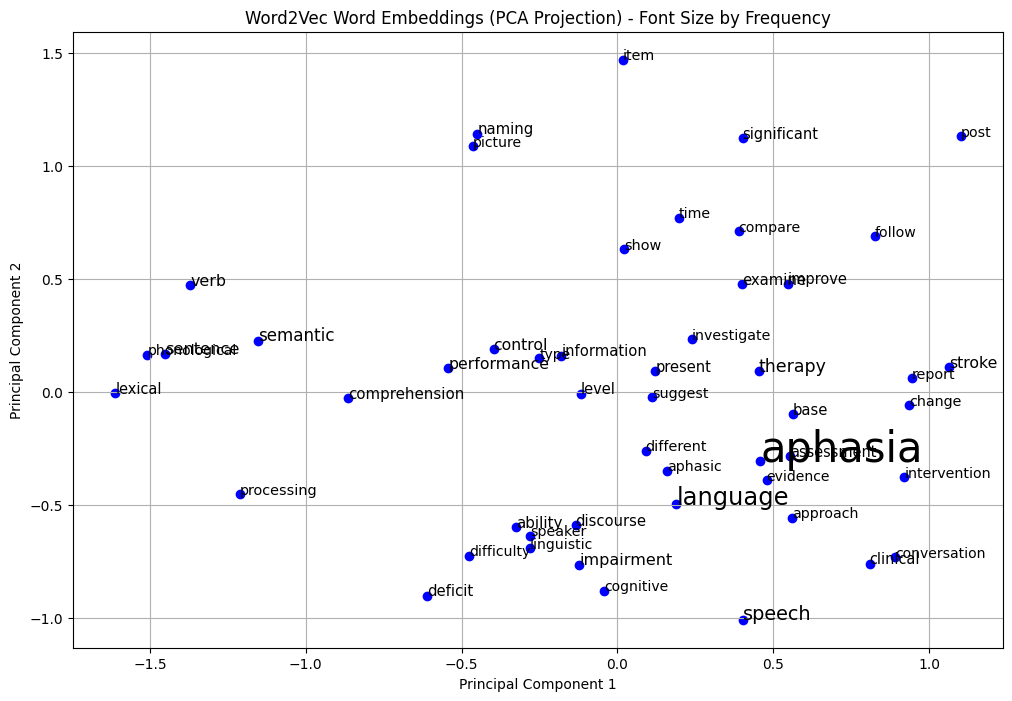

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 상위 50개 단어 가져오기
top_words_freq = word_freq_filtered.most_common(50)  # 단어 빈도 기반 정렬
words = [word for word, freq in top_words_freq]  # 단어 리스트
word_freqs = [freq for word, freq in top_words_freq]  # 해당 단어의 빈도수 리스트

# Word2Vec에서 해당 단어들의 벡터 추출
word_vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]

# PCA로 2차원 축소
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# 빈도수 기반 글자 크기 설정 (최소 8, 최대 30)
min_font = 8
max_font = 30
font_sizes = [min_font + (max_font - min_font) * (freq / max(word_freqs)) for freq in word_freqs]

# 시각화
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1], marker='o', color='blue')

# 각 단어를 빈도수에 따라 크기를 조절하여 표시
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]), fontsize=font_sizes[i])

plt.title("Word2Vec Word Embeddings (PCA Projection) - Font Size by Frequency")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()



#16 2-gram(연속된 3개 단어) 분석

In [ ]:
from collections import Counter
from nltk.util import ngrams

# 전처리된 텍스트에서 2-gram 추출
all_2grams = []
for text in df['filtered_abstract']:
    tokens = text.split()  # 단어 단위로 분할
    bigrams = list(ngrams(tokens, 2))  # 2-gram 생성
    all_2grams.extend(bigrams)

# 2-gram 빈도 계산
bigram_counts = Counter(all_2grams)

# 30회 이상 등장하는 2-gram 필터링
frequent_bigrams = {k: v for k, v in bigram_counts.items() if v >= 30}

# 데이터프레임 변환
import pandas as pd
bigram_df = pd.DataFrame(frequent_bigrams.items(), columns=["Bigram", "Frequency"]).sort_values(by="Frequency", ascending=False)

# 출력
bigram_df


,Bigram,Frequency
21,"(speech, language)",348
45,"(post, stroke)",238
46,"(stroke, aphasia)",185
201,"(brain, damage)",177
181,"(language, impairment)",175
...,...,...
190,"(aphasia, relate)",30
88,"(descriptive, statistic)",30
205,"(month, follow)",30
197,"(significantly, low)",30


#17 3-gram(연속된 3개 단어) 분석

In [ ]:
# 전처리된 텍스트에서 3-gram 추출
all_3grams = []
for text in df['filtered_abstract']:
    tokens = text.split()  # 단어 단위로 분할
    trigrams = list(ngrams(tokens, 3))  # 3-gram 생성
    all_3grams.extend(trigrams)

# 3-gram 빈도 계산
trigram_counts = Counter(all_3grams)

# 10회 이상 등장하는 3-gram 필터링
frequent_trigrams = {k: v for k, v in trigram_counts.items() if v >= 10}

# 데이터프레임 변환
trigram_df = pd.DataFrame(frequent_trigrams.items(), columns=["Trigram", "Frequency"]).sort_values(by="Frequency", ascending=False)

# 출력
trigram_df


,Trigram,Frequency
18,"(primary, progressive, aphasia)",98
17,"(post, stroke, aphasia)",92
9,"(speech, language, pathologist)",88
5,"(speech, language, therapy)",71
6,"(speech, language, therapist)",71
...,...,...
113,"(case, series, design)",10
16,"(wab, r, fluency)",10
122,"(orienting, executive, control)",10
126,"(activity, daily, living)",10


#19 2, 3-gram(연속된 3개 단어) 빈도 분석

In [ ]:
from collections import Counter
from nltk.util import ngrams
import pandas as pd

### 2-gram 분석 ###
all_2grams = []
for text in df['filtered_abstract']:
    tokens = text.split()
    bigrams = list(ngrams(tokens, 2))  # 2-gram 생성
    all_2grams.extend(bigrams)

# 2-gram 빈도 계산
bigram_counts = Counter(all_2grams)

### 3-gram 분석 ###
all_3grams = []
for text in df['filtered_abstract']:
    tokens = text.split()
    trigrams = list(ngrams(tokens, 3))  # 3-gram 생성
    all_3grams.extend(trigrams)

# 3-gram 빈도 계산
trigram_counts = Counter(all_3grams)

# 2-gram & 3-gram 분석 결과 확인
print("2-gram 개수:", len(bigram_counts))
print("3-gram 개수:", len(trigram_counts))



2-gram 개수: 157419
3-gram 개수: 232041


#20 2, 3-ggram 시각화

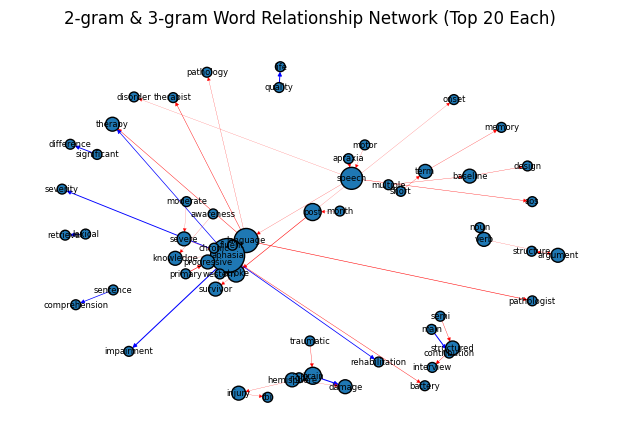

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 상위 20개 2-gram 및 3-gram 선택
top_bigrams = dict(bigram_counts.most_common(20))
top_trigrams = dict(trigram_counts.most_common(20))

# 네트워크 그래프 초기화
G = nx.DiGraph()

# 2-gram 네트워크 추가 (파란색 엣지)
for (word1, word2), freq in top_bigrams.items():
    G.add_edge(word1, word2, weight=freq, color="blue")

# 3-gram 네트워크 추가 (빨간색 엣지)
for (word1, word2, word3), freq in top_trigrams.items():
    G.add_edge(word1, word2, weight=freq, color="red")
    G.add_edge(word2, word3, weight=freq, color="red")

# 노드 크기 설정 (작게 조정)
node_size = [G.degree(n) * 50 for n in G.nodes()]  # 노드 크기 축소

# 엣지 속성 설정 (가중치를 두께로 반영, 얇게 조정)
edges = G.edges(data=True)
edge_colors = [edge[2]["color"] for edge in edges]
edge_weights = [G[u][v]['weight'] / max(top_bigrams.values()) * 1.5 for u, v in G.edges()]  # 두께 축소

# 그래프 시각화 (논문 삽입을 위한 작은 사이즈)
plt.figure(figsize=(6, 4))  # 논문용 작은 사이즈 설정
pos = nx.spring_layout(G, k=0.8)  # 노드 위치 설정, 간격 조정

# 네트워크 그래프 그리기 (화살표 포함, 두께 조절)
nx.draw(G, pos, with_labels=True, node_size=node_size, width=edge_weights, edge_color=edge_colors, font_size=6, edgecolors="black", arrows=True, arrowstyle='-|>', arrowsize=6)

# 제목 설정
plt.title("2-gram & 3-gram Word Relationship Network (Top 20 Each)")
plt.show()



#21 LDA 모델 학습을 위한 전처리

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess

# 문서를 토큰화 및 전처리 (불용어 제거 포함)
def preprocess_text(text):
    return simple_preprocess(text, deacc=True)

# 전처리된 텍스트 리스트 생성
data_words = [preprocess_text(text) for text in df['filtered_abstract']]

# 단어 사전(Dictionary) 및 코퍼스 생성
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# 사전 크기 출력
print(f"Total unique tokens: {len(id2word)}")
print(f"Total documents: {len(corpus)}")


Total unique tokens: 9967
Total documents: 1748


#21 최적의 토픽 수 탐색 (1~14개)

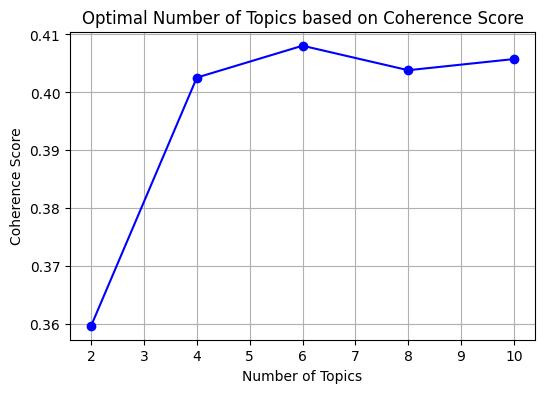

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# 최적의 토픽 수를 찾기 위해 2부터 10까지 2개 단위로 변화시키며 Coherence 점수 계산
coherence_values = []
topic_range = range(2, 11, 2)  # 2, 4, 6, 8, 10

for num_topics in topic_range:
    lda_model = gensim.models.LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto',
        eta='auto'
    )

    # Coherence Score 계산
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model_lda.get_coherence())

# 그래프 그리기 (논문 삽입 가능하도록 작은 사이즈)
plt.figure(figsize=(6, 4))
plt.plot(topic_range, coherence_values, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics based on Coherence Score")
plt.grid(True)

# 그래프 저장 (논문 삽입용)
plt.savefig("Optimal_Topic_Coherence.png", dpi=300, bbox_inches='tight')
plt.show()


#22 coherence 와 perplexity 시각화

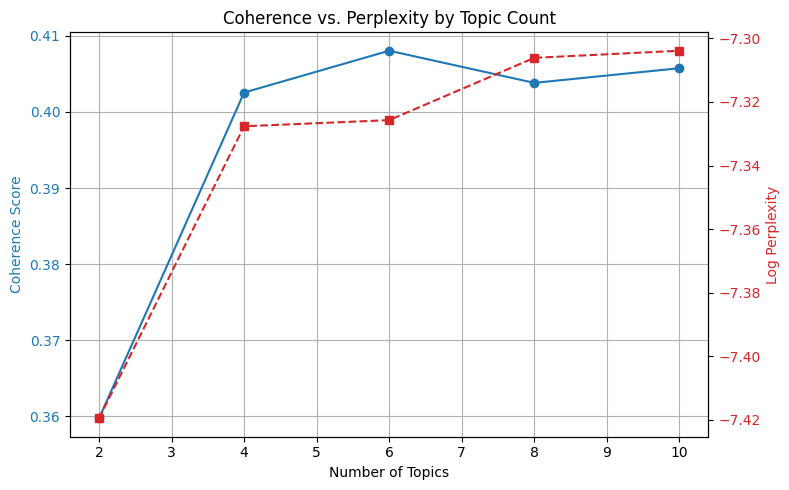

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel, LdaModel

# Coherence와 Perplexity 저장 리스트
coherence_values = []
perplexity_values = []
topic_range = range(2, 11, 2)

for num_topics in topic_range:
    lda_model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto',
        eta='auto'
    )

    # Coherence 계산
    coherence_model = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

    # Perplexity 계산
    perplexity_values.append(lda_model.log_perplexity(corpus))

# ✅ 그래프 시각화
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color=color)
ax1.plot(topic_range, coherence_values, marker='o', linestyle='-', color=color, label='Coherence')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Coherence vs. Perplexity by Topic Count')
ax1.grid(True)

# 두 번째 Y축 (Perplexity)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Log Perplexity', color=color)
ax2.plot(topic_range, perplexity_values, marker='s', linestyle='--', color=color, label='Perplexity')
ax2.tick_params(axis='y', labelcolor=color)

# 저장 및 출력
plt.tight_layout()
plt.savefig("Coherence_Perplexity_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()


#23 3개의 토픽을 기반으로 LDA 모델을 학습하고, 주요 단어 및 토픽 분포를 분석(토픽 수 = 6, 학습 반복 횟수 = 15)

In [ ]:
import gensim
import gensim.corpora as corpora

# 전처리된 텍스트 리스트 (이미 전처리된 데이터 사용)
data_words = [simple_preprocess(text) for text in df['filtered_abstract']]

# 단어 사전(Dictionary) 및 코퍼스 생성
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# LDA 모델 학습 (토픽 수 = 6, 반복 학습 15회)
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=6,  # 토픽 수 설정
    random_state=42,
    passes=15,  # 학습 반복 횟수 설정
    alpha='auto',
    eta='auto'
)

# 각 토픽의 주요 단어 출력
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.034*"aphasia" + 0.007*"stroke" + 0.007*"ability" + 0.006*"language" + 0.006*"comprehension" + 0.005*"score" + 0.005*"scale" + 0.005*"severity" + 0.005*"assessment" + 0.005*"memory"')
(1, '0.026*"language" + 0.016*"aphasia" + 0.010*"speech" + 0.007*"brain" + 0.007*"impairment" + 0.007*"deficit" + 0.006*"cognitive" + 0.006*"performance" + 0.006*"hemisphere" + 0.006*"lesion"')
(2, '0.015*"semantic" + 0.014*"aphasia" + 0.009*"phonological" + 0.009*"naming" + 0.009*"error" + 0.008*"name" + 0.008*"lexical" + 0.008*"control" + 0.008*"picture" + 0.007*"gesture"')
(3, '0.034*"aphasia" + 0.022*"therapy" + 0.011*"language" + 0.010*"speech" + 0.009*"intervention" + 0.008*"improve" + 0.007*"improvement" + 0.006*"base" + 0.006*"post" + 0.006*"discourse"')
(4, '0.042*"aphasia" + 0.012*"conversation" + 0.010*"social" + 0.007*"experience" + 0.006*"partner" + 0.006*"stroke" + 0.006*"language" + 0.006*"life" + 0.006*"interview" + 0.006*"training"')
(5, '0.024*"verb" + 0.023*"sentence" + 0.014*"aph

#24 문서별 토픽 분포 분석

In [ ]:
# 문서별 토픽 분포 확인
document_topics = lda_model.get_document_topics(corpus)

# 문서별 주요 토픽 정리
doc_topic_df = pd.DataFrame([
    sorted(doc, key=lambda x: -x[1])[0] for doc in document_topics
], columns=["Dominant_Topic", "Probability"])

# 데이터프레임 미리보기
print(doc_topic_df.head())

# 문서별 주요 토픽 빈도수 분석
doc_topic_counts = doc_topic_df["Dominant_Topic"].value_counts()

# 데이터프레임 변환 및 출력
doc_topic_distribution = pd.DataFrame({
    "Topic": doc_topic_counts.index,
    "Document Count": doc_topic_counts.values
})

print(doc_topic_distribution)


   Dominant_Topic  Probability
0               5     0.997853
1               4     0.972800
2               0     0.575893
3               5     0.656337
4               4     0.577354
   Topic  Document Count
0      4             333
1      2             323
2      3             322
3      1             279
4      5             270
5      0             221


#25 토픽 시각화 (pyLDAvis 설치)

In [ ]:
!pip install pyLDAvis


#26 토픽 시각화 (pyLDAvis 활용)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# 시각화 데이터 생성
lda_visualization = gensimvis.prepare(lda_model, corpus, id2word)

# 시각화 실행
pyLDAvis.display(lda_visualization)


#27 연도와 토픽점유율 간 상관관계 분석

#28 데이터프레임 확인

In [ ]:
print(df.columns)  # 데이터프레임 컬럼 목록 출력


Index(['year', 'issue', 'title', 'abstract', 'processed_abstract',
       'filtered_abstract'],
      dtype='object')


#29 각 토픽의 주용 단어 출력

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

# 전처리된 텍스트 리스트
data_words = [simple_preprocess(text) for text in df['filtered_abstract']]

# 단어 사전(Dictionary) 및 코퍼스 생성
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# LDA 모델 학습 (토픽 수 = 6, 반복 학습 15회)
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=6,  # 토픽 수 설정
    random_state=42,
    passes=15,  # 학습 반복 횟수 설정
    alpha='auto',
    eta='auto'
)

# 각 토픽의 주요 단어 출력
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.034*"aphasia" + 0.007*"stroke" + 0.007*"ability" + 0.006*"language" + 0.006*"comprehension" + 0.005*"score" + 0.005*"scale" + 0.005*"severity" + 0.005*"assessment" + 0.005*"memory"')
(1, '0.026*"language" + 0.016*"aphasia" + 0.010*"speech" + 0.007*"brain" + 0.007*"impairment" + 0.007*"deficit" + 0.006*"cognitive" + 0.006*"performance" + 0.006*"hemisphere" + 0.006*"lesion"')
(2, '0.015*"semantic" + 0.014*"aphasia" + 0.009*"phonological" + 0.009*"naming" + 0.009*"error" + 0.008*"name" + 0.008*"lexical" + 0.008*"control" + 0.008*"picture" + 0.007*"gesture"')
(3, '0.034*"aphasia" + 0.022*"therapy" + 0.011*"language" + 0.010*"speech" + 0.009*"intervention" + 0.008*"improve" + 0.007*"improvement" + 0.006*"base" + 0.006*"post" + 0.006*"discourse"')
(4, '0.042*"aphasia" + 0.012*"conversation" + 0.010*"social" + 0.007*"experience" + 0.006*"partner" + 0.006*"stroke" + 0.006*"language" + 0.006*"life" + 0.006*"interview" + 0.006*"training"')
(5, '0.024*"verb" + 0.023*"sentence" + 0.014*"aph

#30  # df가 제대로 로드되었는지 확인

In [ ]:
print(df.head())  # df가 제대로 로드되었는지 확인


   year  issue                                              title  \
0  2024      1  Priming Sentence Production in Older Adults: E...   
1  2024      1  Patient Perspectives of a University-Based Int...   
2  2024      1  âPlay on Wordsâ: An analysis of a particip...   
3  2024      1  Structural priming from production to comprehe...   
4  2024      1  âDifficult but Goodâ: enjoying accessible ...   

                                            abstract  \
0  ABSTRACT\nPurpose\nStructural priming- speaker...   
1  ABSTRACT\nBackground\nStroke survivors with ap...   
2  ABSTRACT\nWe describe the impacts that weekly ...   
3  ABSTRACT\nBackground\nMany people with aphasia...   
4  ABSTRACT\nBackground\nDigital technology is in...   

                                  processed_abstract  \
0  abstract purpose structural unconscious tenden...   
1  abstract background stroke survivor aphasia pa...   
2  abstract describe impact weekly drama session ...   
3  abstract background p

연도 구간별 토픽 점유율 계산

#31 토픽 분석을 위한 데이터 처리

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

# 문서 토큰화 및 전처리
data_words = [simple_preprocess(text) for text in df['filtered_abstract']]

# 단어 사전(Dictionary) 및 코퍼스 생성
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# LDA 모델 학습 (토픽 수 = 6, 학습 반복 횟수 = 15)
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=6,
    passes=15,
    random_state=42
)

# 문서별 토픽 분포 확인
document_topics = lda_model.get_document_topics(corpus)

# 문서별 주요 토픽 정리
df_topic = pd.DataFrame([
    sorted(doc, key=lambda x: -x[1])[0] for doc in document_topics
], columns=["Dominant_Topic", "Probability"])

# 연도 데이터 추가
df['year_group'] = df['year'].apply(lambda x:
    "2000-2004" if 2000 <= x <= 2004 else
    "2005-2009" if 2005 <= x <= 2009 else
    "2010-2014" if 2010 <= x <= 2014 else
    "2015-2019" if 2015 <= x <= 2019 else
    "2020-2024"
)

df_topic["year_group"] = df["year_group"].reset_index(drop=True)

# 데이터 확인
print(df_topic.head())


   Dominant_Topic  Probability year_group
0               5     0.978769  2020-2024
1               4     0.966402  2020-2024
2               0     0.555074  2020-2024
3               5     0.650752  2020-2024
4               4     0.584668  2020-2024


#32 연도 구간 정의 함수

In [ ]:
# 연도 구간을 정의하는 함수
def assign_year_group(year):
    if 2000 <= year <= 2004:
        return "2000-2004"
    elif 2005 <= year <= 2009:
        return "2005-2009"
    elif 2010 <= year <= 2014:
        return "2010-2014"
    elif 2015 <= year <= 2019:
        return "2015-2019"
    elif 2020 <= year <= 2024:
        return "2020-2024"
    else:
        return "Unknown"


#33 데이터 프로임 확인

In [ ]:
df_topic["year_group"] = df["year"].apply(assign_year_group).reset_index(drop=True)


#34 문서별 주요 토픽 정리

In [ ]:
# 문서별 주요 토픽 정리
df_topic = pd.DataFrame([
    sorted(doc, key=lambda x: -x[1])[0] for doc in lda_model.get_document_topics(corpus)
], columns=["Dominant_Topic", "Probability"])

# 연도 데이터 추가
df_topic["year_group"] = df["year"].apply(assign_year_group).reset_index(drop=True)


#35 연도 구간별 토픽 점유율 분석 및 시각화

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

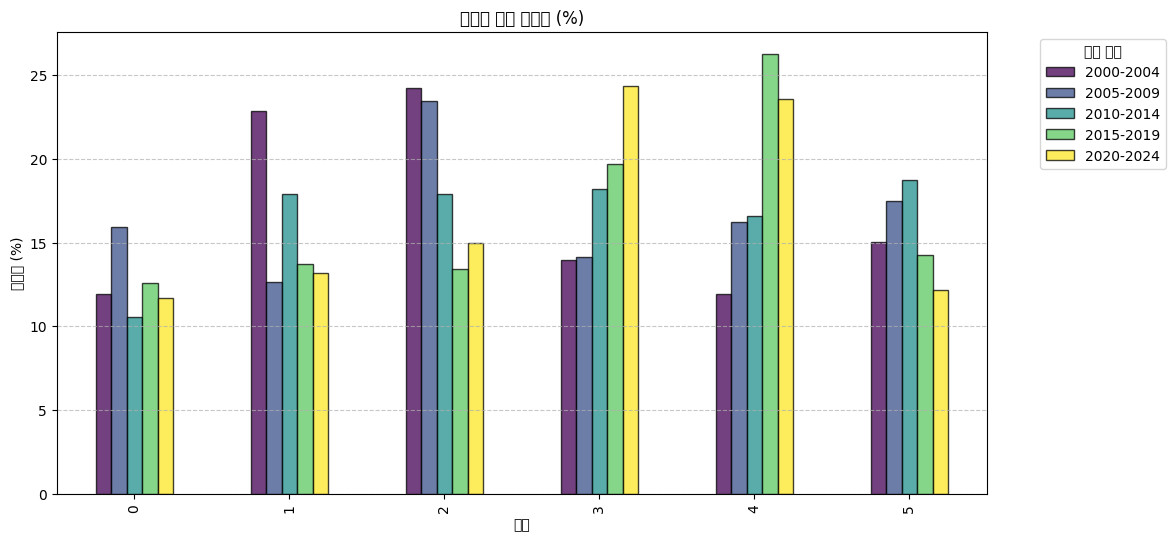

In [ ]:
import matplotlib.pyplot as plt

# 연도 구간별 토픽 개수 계산
topic_distribution = df_topic.groupby(["year_group", "Dominant_Topic"]).size().unstack(fill_value=0)

# 각 연도 구간 내에서 토픽 점유율(%) 계산
topic_share = topic_distribution.div(topic_distribution.sum(axis=1), axis=0) * 100

# 토픽 점유율 시각화
topic_share.T.plot(kind="bar", figsize=(12, 6), colormap="viridis", alpha=0.75, edgecolor="black")
plt.title("연도별 토픽 점유율 (%)")
plt.xlabel("토픽")
plt.ylabel("점유율 (%)")
plt.legend(title="연도 구간", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


#36 연도 구간별 토픽 변화 꺽은선 그래프

<ipython-input-39-4eb30ec61134>:23: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-4eb30ec61134>:23: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-4eb30ec61134>:23: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-4eb30ec61134>:23: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-4eb30ec61134>:23: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-4eb30ec61134>:23: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-39-4eb30ec61134>:23: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipytho

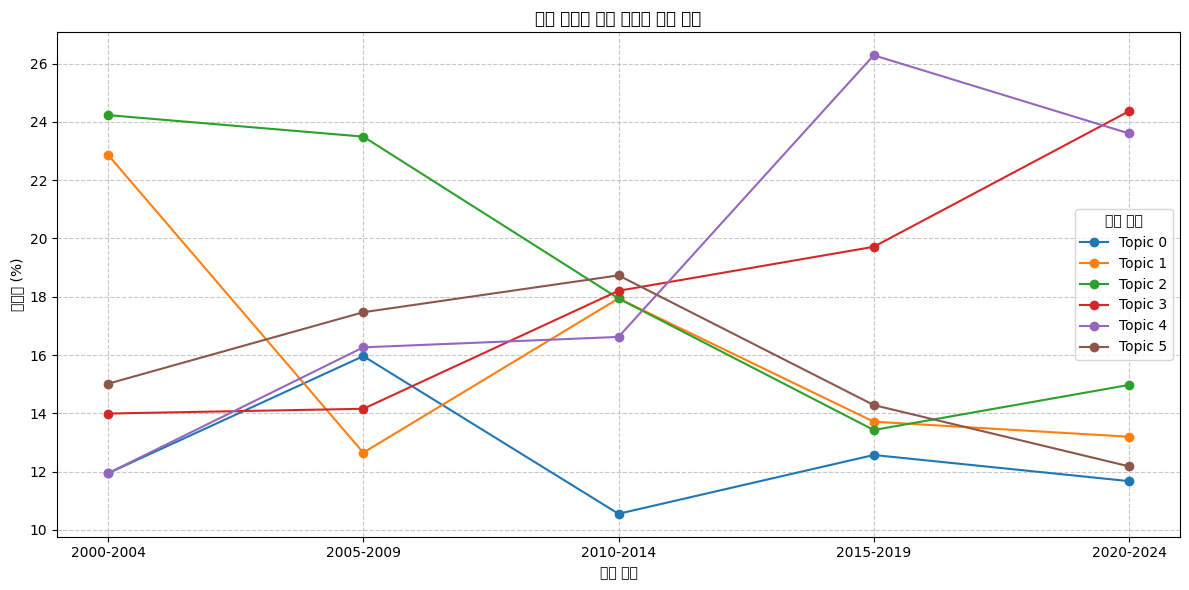

In [ ]:
import matplotlib.pyplot as plt

# 연도 구간별 토픽 개수 계산
topic_distribution = df_topic.groupby(["year_group", "Dominant_Topic"]).size().unstack(fill_value=0)

# 각 연도 구간 내에서 토픽 점유율(%) 계산
topic_share = topic_distribution.div(topic_distribution.sum(axis=1), axis=0) * 100

# 연도 구간 순서 정렬 (가로축이 제대로 정렬되도록)
topic_share = topic_share.reindex(["2000-2004", "2005-2009", "2010-2014", "2015-2019", "2020-2024"])

# 꺾은선 그래프 그리기
plt.figure(figsize=(12, 6))
for topic in topic_share.columns:
    plt.plot(topic_share.index, topic_share[topic], marker='o', label=f"Topic {topic}")

# 시각적 요소 설정
plt.title("연도 구간별 토픽 점유율 변화 추이")
plt.xlabel("연도 구간")
plt.ylabel("점유율 (%)")
plt.legend(title="토픽 번호")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
